# 목표: 타이타닉 데이터를 활용하여 생존률에 대한 통찰력을 얻고 싶다.
1. 먼저 데이터의 파라미터들을 정의하고
2. 어떻게 데이터를 활용할지 계획을 세운 후
3. 타이타닉 상황에서 생존률에 대한 통찰력을 얻어보자.

# 01. 라이브러리 및 데이터 불러오기
- 사용할 라이브러리 import 및 데이터 불러온 후
- 데이터의 info, describe, parameters(변수 정의)를 파악하자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

# 환경 설정
pd.set_option('display.max_columns', None) # 데이터 프레임 컬럼 최대출력 갯수제한 해제
pd.options.display.float_format = '{:.4f}'.format # 출력 소수점 자리 4자리로 제한

# Import 라이브러리 버전 체크
# print(np.__version__)         1.26.1
# print(pd.__version__)         2.1.3
# print(matplotlib.__version__) 3.8.1 
# print(sns.__version__)        0.13.0
# print(scipy.__version__)      1.11.3
# print(sklearn.__version__)    1.3.2

## 01-01. Import Data

In [2]:
df = pd.read_csv('../Data/Titanic_Data.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0000,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,691.0000,"Braund, Mr. Owen Harris",22.0000,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0000
1,2,1.0000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,90.0000,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0000,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0000
2,3,1.0000,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0000,"Heikkinen, Miss Laina",26.0000,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0000


## 01-02. Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## 01-03. Data Describe

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.0000,891.0000,1309.0000,1046.0000,1309.0000,1309.0000,1308.0000,1304.0000,1302.0000,1304.0000
mean,655.0000,0.3838,2.2949,29.8811,0.4989,0.3850,33.2955,658.5345,29.4158,2.2914
std,378.0201,0.4866,0.8378,14.4135,1.0417,0.8656,51.7587,380.3774,13.7590,0.8409
min,1.0000,0.0000,1.0000,0.1700,0.0000,0.0000,0.0000,1.0000,0.1700,1.0000
25%,328.0000,0.0000,2.0000,21.0000,0.0000,0.0000,7.8958,326.7500,21.0000,1.7500
50%,655.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542,661.5000,28.0000,3.0000
75%,982.0000,1.0000,3.0000,39.0000,1.0000,0.0000,31.2750,987.2500,37.7500,3.0000
max,1309.0000,1.0000,3.0000,80.0000,8.0000,9.0000,512.3292,1314.0000,74.0000,3.0000


## 01-04. Data Parameters

In [5]:
for index, column_name in enumerate(df.columns):
    print(f'-----{index+1}번째 컬럼-----')
    print(df[column_name].value_counts().head(5))
    # print("\n")

-----1번째 컬럼-----
PassengerId
1      1
861    1
879    1
878    1
877    1
Name: count, dtype: int64
-----2번째 컬럼-----
Survived
0.0000    549
1.0000    342
Name: count, dtype: int64
-----3번째 컬럼-----
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
-----4번째 컬럼-----
Name
Connolly, Miss. Kate               2
Kelly, Mr. James                   2
Braund, Mr. Owen Harris            1
Johnson, Master. Harold Theodor    1
Gustafsson, Mr. Alfred Ossian      1
Name: count, dtype: int64
-----5번째 컬럼-----
Sex
male      843
female    466
Name: count, dtype: int64
-----6번째 컬럼-----
Age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
Name: count, dtype: int64
-----7번째 컬럼-----
SibSp
0    891
1    319
2     42
4     22
3     20
Name: count, dtype: int64
-----8번째 컬럼-----
Parch
0    1002
1     170
2     113
3       8
5       6
Name: count, dtype: int64
-----9번째 컬럼-----
Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: 

## 01-05. Column define

1. **PassengerId (승객 ID)**: 각 승객에게 할당된 고유 식별 번호입니다.
2. **Survived (생존 여부)**: 승객의 생존 여부를 나타냅니다. 0은 사망, 1은 생존을 의미합니다.
3. **Pclass (객실 등급)**: 승객의 객실 등급으로, 승객의 사회적, 경제적 지위를 나타냅니다. 1등급(1), 2등급(2), 3등급(3)이 있습니다.
4. **Name (승객 이름)**: 승객의 전체 이름입니다.
5. **Sex (성별)**: 승객의 성별입니다. 남성(male)과 여성(female)으로 구분됩니다.
6. **Age (나이)**: 승객의 나이입니다. 일부 누락된 값이 있을 수 있습니다.
7. **SibSp**: 함께 탑승한 형제, 자매, 배우자의 수입니다.
8. **Parch**: 함께 탑승한 부모, 자녀의 수입니다.
9. **Ticket (티켓 번호)**: 승객의 티켓 번호입니다.
10. **Fare (요금)**: 티켓의 요금입니다.
11. **Cabin (객실 번호)**: 승객이 머무른 객실의 번호입니다. 많은 누락된 값이 있을 수 있습니다.
12. **Embarked (탑승 항구)**: 승객이 타이타닉호에 탑승한 항구를 나타냅니다. C = Cherbourg, Q = Queenstown, S = Southampton입니다.
13. **WikiId**: 위키 데이터에서의 승객 식별 번호입니다.
14. **Name_wiki (위키에서의 이름)**: 위키 데이터에서의 승객 이름입니다.
15. **Age_wiki (위키에서의 나이)**: 위키 데이터에서의 승객 나이입니다.
16. **Hometown (고향)**: 승객의 고향입니다.
17. **Boarded (탑승 지점)**: 승객이 타이타닉호에 탑승한 지점입니다.
18. **Destination (목적지)**: 승객의 최종 목적지입니다.
19. **Lifeboat (구명보트)**: 탈출 시 사용한 구명보트 번호입니다.
20. **Body (시신 번호)**: 수습된 시신의 번호입니다.
21. **Class (등급)**: 승객의 사회적, 경제적 등급을 나타냅니다. 이는 `Pclass`와

▣ 종속변수: Survived

▣ 독립변수: Pclass, Sex, Age
1. Pclass: 승객의 사회적, 경제적 지위 1, 2, 3등급
2. Sex: Male(남), Female(여)
3. Age: 나이 유사한 정보를 제공할 수 있습니다.

## 01-06. Data Processing

In [6]:
df.isna().sum()

# 결측치 수
# Survived 418
# Pclass 0
# Sex 0
# Age 263
# 생존여부와 승객의 나이에 결측치가 보이므로 결측치 처리를 어떻게 할지 고민 해야됨

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [7]:
# 먼저 필요한 변수들만 추출하도록 하자
A01 = df[['Survived', 'Pclass', 'Sex', 'Age']]
A01.head(3)

,Survived,Pclass,Sex,Age
0,0.0000,3,male,22.0000
1,1.0000,1,female,38.0000
2,1.0000,3,female,26.0000


In [8]:
# 생존 여부가 확인되지 않았음에도 Pclass, Sex, Age 데이터가 있다는게 해석하기 난해하다.
# 추론을 통해 데이터의 결측치를 대체할 방법을 찾아야하는데 당시의 상황을 판단하기가 힘들다.
A_Survived_NA = A01[A01['Survived'].isna()]
A_Survived_NA

,Survived,Pclass,Sex,Age
891,NaN,3,male,34.5000
892,NaN,3,female,47.0000
893,NaN,2,male,62.0000
894,NaN,3,male,27.0000
895,NaN,3,female,22.0000
...,...,...,...,...
1304,NaN,3,male,NaN
1305,NaN,1,female,39.0000
1306,NaN,3,male,38.5000
1307,NaN,3,male,NaN


In [9]:
print(A01.isna().sum())
# 생존여부의 결측치가 418개
# 승객나이의 결측치가 263개

# 행을 기준으로 결측치 수를 중복없이 체크하려면?
print(A01.isna().any(axis=1).sum()) # 결측치가 있는 고유 행 595개
print(len(A01)) # 데이터의 총 rows 갯수는 1309개다.
print((len(A01)) - (A01.isna().any(axis=1).sum())) # 결측치를 제거하게된다면 714개의 행 데이터가 남는다.

# 그렇다면 총 데이터에서 결측치를 임의로 대체할 수 없으니 714개의 행 데이터로만 쓸까?
# 고민 고민 고민 돼...

Survived    418
Pclass        0
Sex           0
Age         263
dtype: int64
595
1309
714


In [10]:
print(A01.shape)

(1309, 4)


In [11]:
# 임의로 결측치를 대체할 방안이 생각이 안나므로
# 결측치는 제거하기로 결정했다.
A02 = A01.copy()
A02.dropna(inplace=True)

# 결측치 제거 후 인덱스 정렬
A02 = A02.reset_index(drop=True)
A02.info()
A02.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    float64
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.4+ KB


,Survived,Pclass,Sex,Age
0,0.0000,3,male,22.0000
1,1.0000,1,female,38.0000
2,1.0000,3,female,26.0000


In [12]:
# 생존여부 및 나이가 float 형태로 되어있으므로 데이터 타입을 변형해주자.
A03 = A02.copy()
A03 = A03.astype({'Survived': 'int64', 'Age': 'int64'})
A03.info()
A03.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    int64 
 1   Pclass    714 non-null    int64 
 2   Sex       714 non-null    object
 3   Age       714 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.4+ KB


,Survived,Pclass,Sex,Age
0,0,3,male,22
1,1,1,female,38
2,1,3,female,26


# 02. 탐색적 데이터 분석

## 02-01. 연령대별 생존율 EDA
- 연령대를 4개의 범주로 나눈 후 생존율을 분석하기 위해 EDA를 실시하였다.
- 연령대의 범주는 아래와 같다.
- '1. Youth', '2. Adults', '3. Middle-Age', '4. Elderly'

In [13]:
# A03 작업에서 데이터 타입을 변형 시켰다.
# 연령대간의 생존여부를 체크하기 위해 나이를 기준으로 연령대를 생성해주자.
A04 = A03.copy()
# A04['Age'].value_counts()

AgeBand = ['1. Youth', '2. Adults', '3. Middle-Age', '4. Elderly']

def AgeRg (x) :
    
    if x['Age'] <= 20 :
        return AgeBand[0]
        
    elif x['Age'] <= 40 :
        return AgeBand[1]
        
    elif x['Age'] <= 60 :
        return AgeBand[2]
        
    else :
        return AgeBand[3]
        
A04['AgeRange'] = A04.apply(AgeRg, axis=1)
A04.head(3)

,Survived,Pclass,Sex,Age,AgeRange
0,0,3,male,22,2. Adults
1,1,1,female,38,2. Adults
2,1,3,female,26,2. Adults


In [14]:
Age_Group = A04.groupby(['AgeRange']).agg({'Survived':'sum'
                                          , 'Pclass':'count'}).reset_index()

Age_Group['Survived_Rate'] = Age_Group['Survived'] / Age_Group['Pclass']
Age_Group

,AgeRange,Survived,Pclass,Survived_Rate
0,1. Youth,82,180,0.4556
1,2. Adults,153,386,0.3964
2,3. Middle-Age,50,126,0.3968
3,4. Elderly,5,22,0.2273


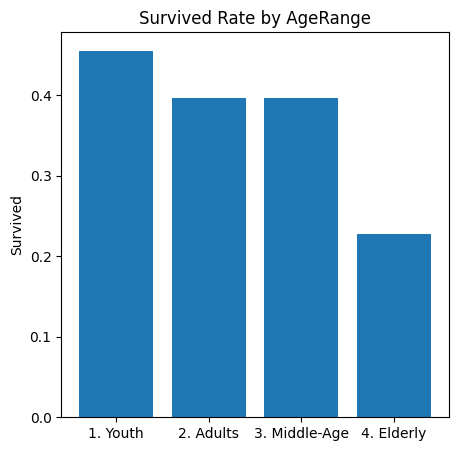

In [15]:
f, ax = plt.subplots(figsize=(5, 5))

# 0~20세 > 21세 ~ 40세 = 41세 ~ 60세 > 61이상 순으로 생존율이 높다.
ax.bar(Age_Group['AgeRange'], Age_Group['Survived_Rate'])
ax.set_title('Survived Rate by AgeRange')
ax.set_ylabel('Survived')
plt.show()

## 02-02. Pclass별 생존율 EDA
- Pclass의 고유값을 범주로 나눈 후 생존율을 분석하기 위해 EDA를 실시하였다.
- 연령대의 범주는 아래와 같다.
- 1, 2, 3등급 숫자가 낮을수록 사회적 지위(소득)가 높다.

In [16]:
Pclass_Group = A04.groupby(['Pclass']).agg({'Survived':'sum'
                                           , 'AgeRange': 'count'}).reset_index()

Pclass_Group['Survived_Rate'] = Pclass_Group['Survived'] / Pclass_Group['AgeRange']
Pclass_Group

,Pclass,Survived,AgeRange,Survived_Rate
0,1,122,186,0.6559
1,2,83,173,0.4798
2,3,85,355,0.2394


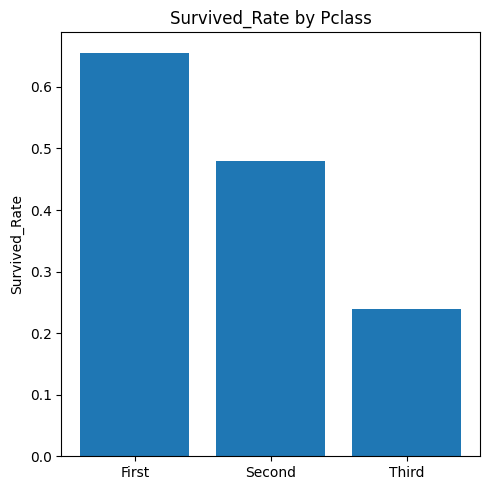

In [17]:
f, ax = plt.subplots(figsize=(5, 5))

# X축 범주가 숫자로 되어있기에 범주형 문자형 목록으로 바꾸어 주었다.
# 1등실 > 2등실 > 3등실 순으로 생존율이 차이가 난다.
ax.bar(['First', 'Second', 'Third'], Pclass_Group['Survived_Rate'])
ax.set_title('Survived_Rate by Pclass')
ax.set_ylabel('Survived_Rate')
plt.tight_layout()
plt.show()

## 02-03. Pclass, 성별별 생존율 EDA
- Pclass의 고유값 및 성별로 생존율이 궁금하다.
- 1등실(남/여), 2등실(남/여), 3등실(남/여) 그룹의 생존율을 확인 해보자.
- 등급, 젠더별로 확인 해봤을 때 압도적으로 여성의 생존율이 높다.

In [18]:
Two_Group = A04.groupby(['Pclass', 'Sex']).agg({'Survived':'sum'
                                             , 'AgeRange':'count'}).reset_index()

Two_Group['Survived_Rate'] = Two_Group['Survived'] / Two_Group['AgeRange']
Two_Group

,Pclass,Sex,Survived,AgeRange,Survived_Rate
0,1,female,82,85,0.9647
1,1,male,40,101,0.3960
2,2,female,68,74,0.9189
3,2,male,15,99,0.1515
4,3,female,47,102,0.4608
5,3,male,38,253,0.1502


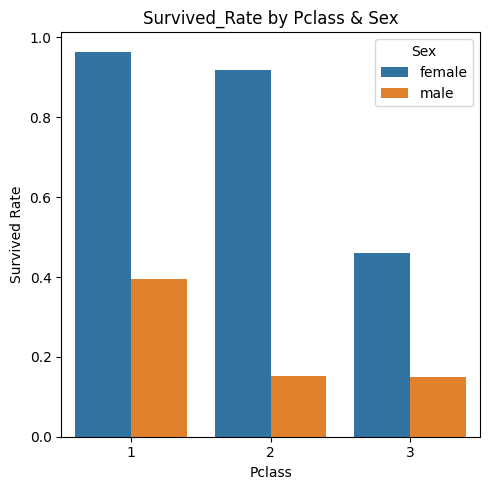

In [19]:
f, ax = plt.subplots(figsize=(5, 5))
# ax.bar(Two_Group['Pclass'], Two_Group['Survived_Rate'], hue=Two_Group['Sex'])
sns.barplot(x='Pclass', y='Survived_Rate', hue='Sex', data=Two_Group)
ax.set_title('Survived_Rate by Pclass & Sex')
ax.set_ylabel('Survived Rate')
plt.tight_layout()
plt.show()

# 03. 다양한 통계검정
- 앞서 EDA를 진행하며 객실의 등급(Pclass)이 높을수록(1에 가까울수록) 생존율이 증가하는 상황을 확인하였다.
- 등급별, 성별별, 등급 및 성별별 그룹들의 통계검정을 실시하고 유의미한 차이가 있는지 확인해보자.

In [20]:
A05 = A04.copy()
A05.info()
A05.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    int64 
 1   Pclass    714 non-null    int64 
 2   Sex       714 non-null    object
 3   Age       714 non-null    int64 
 4   AgeRange  714 non-null    object
dtypes: int64(3), object(2)
memory usage: 28.0+ KB


,Survived,Pclass,Sex,Age,AgeRange
0,0,3,male,22,2. Adults
1,1,1,female,38,2. Adults
2,1,3,female,26,2. Adults


## 03-01. 정규성 검정
- 3개의 변수 생존 여부(Survived), 객실 등급(Pclass), 나이(Age)에 대해서 정규성 검정을 실행했다.
- 중심극한정리에 의하여 데이터는 정규분포를 띄고 있을거라 예측했으나 검정 후 나온 값은 정규성을 띄지 않는다고 한다.
- Survived: p-value = 0.0000000000000000000000000000000000000959376012305171
- Pclass: p-value =  0.0000000000000000000000000000012038891221630104
- Age: p-value = 0.00000010745999645678239

즉, 비모수적인 방법으로 검증을 해야한다.</br>
다양한 비모수 검정을 실행해보자.

In [21]:
from scipy import stats

# 정규성 검정 함수
def shapiro_test(df):
    for column in df.columns:
        print(f"{column}: {stats.shapiro(df[column])}")

# A05 데이터 프레임에서 아래의 3개 컬럼 선택하여 S_Test 변수에 데이터 갖고오기
S_Test = A05[['Survived', 'Pclass', 'Age']]

# 함수 호출
shapiro_test(S_Test)

Survived: ShapiroResult(statistic=0.6236346960067749, pvalue=9.59376012305171e-37)
Pclass: ShapiroResult(statistic=0.7461544275283813, pvalue=1.2038891221630104e-31)
Age: ShapiroResult(statistic=0.9819865226745605, pvalue=1.0745999645678239e-07)


## 03-02. Mann-Whitney U Test
- 두 데이터의 중앙값 비교를 통해 남/여간의 생존여부가 유의미하게 차이나는지 확인해보자
- H0 귀무가설 : 남녀간의 생존여부는 유의미한 차이가 없다.
- H1 대립가설 : 남녀간의 생존여부는 유의미한 차이가 있다.
- 테스트는 두 독립 그룹 간의 중앙값 차이를 비교하는 데 사용되며
- 데이터가 정규 분포를 따르지 않아도 적용할 수 있습니다.

In [22]:
# Mann-Whitney U 테스트 실행
male_survived = A05[A05['Sex'] == 'male']['Survived']
female_survived = A05[A05['Sex'] == 'female']['Survived']

U_statistic, p_value = stats.mannwhitneyu(male_survived, female_survived)
print(f"Mann-Whitney U Test 결과: U-Statistic = {U_statistic}, p-value = {p_value}")

Mann-Whitney U Test 결과: U-Statistic = 26632.5, p-value = 6.196823968125917e-47


In [23]:
# 심심하니 T-Test도 해보자
# T-Test는 비교하는 두 데이터의 정규성 및 등분산을 만족해야된다.

# 독립 표본 t-검정 실행
t_statistic, p_value = stats.ttest_ind(male_survived, female_survived)
print(f"독립 표본 T-Test 결과: T-Statistic = {t_statistic}, p-value = {p_value}")

독립 표본 T-Test 결과: T-Statistic = -17.06714636926601, p-value = 5.224709926801571e-55


### 03-02-01. Mann-Whitney U Test 결과
- 남성 그룹보다 여성 그룹이 훨씬 생존율이 높다는 것을 의미하고
- 남성 그룹과 여성 그룹은 유의미하게 차이난다는 것을 의미한다.

### 03-03. 카이제곱 검정

In [24]:
# 라이브러리 Import
from scipy.stats import chi2_contingency

# 교차표 생성
cross_table = pd.crosstab(A05['Sex'], A05['Survived'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

print("카이제곱 검정 결과")
print("chi2: ", chi2)
print("p-value", p)

카이제곱 검정 결과
chi2:  205.02582752855906
p-value 1.6716678441395299e-46


## 03-03. Pingouin Library
- 카이제곱 독립성 검정을 실시하여 객실 등급별 성별의 독립성을 검정해보았다.
- p-value 값이 0에 가까울정도로 매우 낮아 변수끼리의 연관성이 매우 높은 것으로 나타났다.

In [25]:
import pingouin as pg

# 성별과 객실 등급에 따른 생존율에 대한 분할표를 생성합니다.
contingency_table = pd.crosstab(A05['Sex'], A05['Pclass'], values=A05['Survived'], aggfunc='mean')

# 카이제곱 독립성 검정을 수행합니다.
chi2_results = pg.chi2_independence(data=A05, x='Pclass', y='Sex', correction=False)

# 분할표와 카이제곱 검정 결과를 출력합니다.
print("분할표:\n", contingency_table)
print("\n카이제곱 검정 결과:\n", chi2_results)

분할표:
 Pclass      1      2      3
Sex                        
female 0.9647 0.9189 0.4608
male   0.3960 0.1515 0.1502

카이제곱 검정 결과:
 (Sex      female     male
Pclass                  
1       67.9916 118.0084
2       63.2395 109.7605
3      129.7689 225.2311, Sex     female  male
Pclass              
1           85   101
2           74    99
3          102   253,                  test  lambda    chi2    dof   pval  cramer  power
0             pearson  1.0000 18.9578 2.0000 0.0001  0.1629 0.9803
1        cressie-read  0.6667 18.9762 2.0000 0.0001  0.1630 0.9804
2      log-likelihood  0.0000 19.0526 2.0000 0.0001  0.1634 0.9808
3       freeman-tukey -0.5000 19.1451 2.0000 0.0001  0.1637 0.9813
4  mod-log-likelihood -1.0000 19.2682 2.0000 0.0001  0.1643 0.9819
5              neyman -2.0000 19.6097 2.0000 0.0001  0.1657 0.9835)


In [26]:
contingency_df = pd.DataFrame(contingency_table)
# chi2_results_df = pd.DataFrame(chi2_results)

In [27]:
contingency_df

Pclass,1,2,3
Sex,,,
female,0.9647,0.9189,0.4608
male,0.3960,0.1515,0.1502


# 04. 머신러닝 생존여부 기대빈도 예측
- 데이터를 학습 데이터, 훈련 데이터로 나누기 전 정규화를 통하여 단위를 맞춘 후
- 학습 및 훈련 데이터를 파이프라인을 통해 모델을 구현, 및 성능을 테스트 해보자

In [28]:
A05

,Survived,Pclass,Sex,Age,AgeRange
0,0,3,male,22,2. Adults
1,1,1,female,38,2. Adults
2,1,3,female,26,2. Adults
3,1,1,female,35,2. Adults
4,0,3,male,35,2. Adults
...,...,...,...,...,...
709,0,3,female,39,2. Adults
710,0,2,male,27,2. Adults
711,1,1,female,19,1. Youth
712,1,1,male,26,2. Adults


In [29]:
from sklearn.preprocessing import LabelEncoder

A06 = A05.copy()

# 라벨 인코더 초기화
label_encoder = LabelEncoder()
A06['Sex'] = label_encoder.fit_transform(A06['Sex'])

# 라벨 인코더 초기화
label_encoder = LabelEncoder()
A06['AgeRange'] = label_encoder.fit_transform(A06['AgeRange'])

# 데이터셋 분할
y = A06['Survived']
X = A06.drop(['Survived'], axis=1)

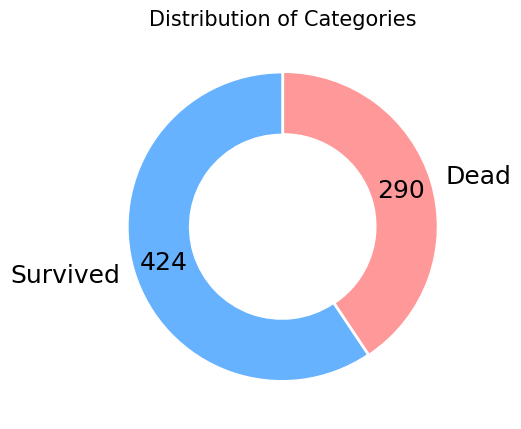

In [30]:
# 생존 여부 파이 그래프를 활용해 비율 시각화하기

# 범주별 갯수 계산
value_counts = pd.Series(y).value_counts()

# 파이 차트 그리기
labels = ['Survived' if index == 0 else 'Dead' for index in value_counts.index]
sizes = value_counts.values
colors = ['#66b2ff', '#ff9999']
explode = (0.005, 0.005)

# autopct를 갯수로 표시하기 위한 함수
def count_format(val):
    return '{:.0f}'.format(val * sum(sizes) / 100)

plt.figure(figsize=(5, 5))
plt.pie(sizes
       , explode=explode
       , labels=labels
       , colors=colors
       , autopct=count_format
       , startangle=90
       , pctdistance=0.8
       , wedgeprops=dict(width=0.4, edgecolor='w')
       , textprops={'fontsize': 18})

# 타이틀 및 출력
plt.title('Distribution of Categories', fontsize=15)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 파이프라인 생성
pipeline = Pipeline([

    # 스케일링: 특성들을 동일한 스케일(단위)로 조정합니다.
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))  # 분류 모델: XGBoost
])

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 파이프라인을 사용하여 모델 학습
pipeline.fit(X_train, y_train)

# 종속변수 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 모델 성능 값 출력
print("Accuracy: {:2f}".format(accuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.800000
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       128
           1       0.89      0.57      0.70        87

    accuracy                           0.80       215
   macro avg       0.83      0.76      0.77       215
weighted avg       0.82      0.80      0.79       215



# 05. 머신러닝 성능평가

## 05-01. Confusion Matrix
혼동 행렬은 실제 값과 예측 값이 얼마나 잘 일치하는지 보여주는 행렬입니다.<br>
이를 통해 모델의 성능을 쉽게 파악할 수 있고, 특히 불균형 데이터셋에 대해 어떤 클래스에 대해 모델이 더 잘 혹은 못 예측하는지 확인할 수 있습니다.

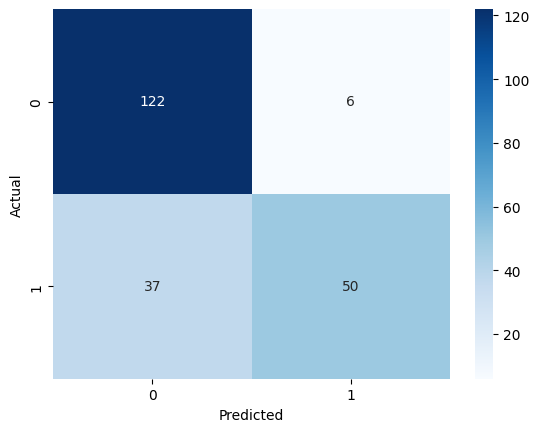

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 05-02. ROC Curve 및 AUC Score
ROC 곡선은 여러 임계값에서의 모델의 성능을 시각화하며, AUC 점수는 ROC 곡선 아래의 면적을 측정합니다.<br>
이는 모델의 성능을 하나의 숫자로 요약하여 제공합니다.

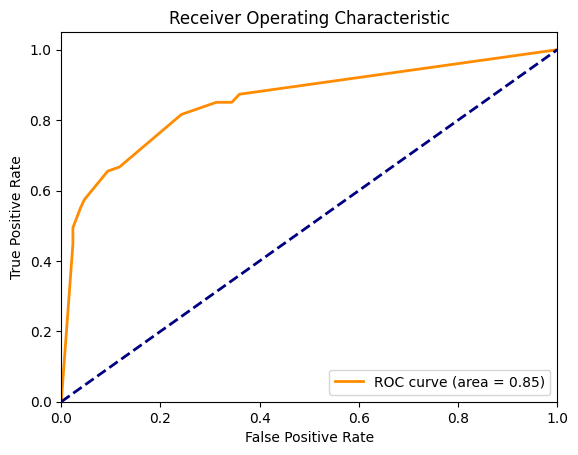

In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 05-03. Precision-Recall Curve
정밀도와 재현율을 동시에 고려하여 모델의 성능을 평가할 수 있습니다.<br>
특히 불균형 데이터셋에서 유용합니다.

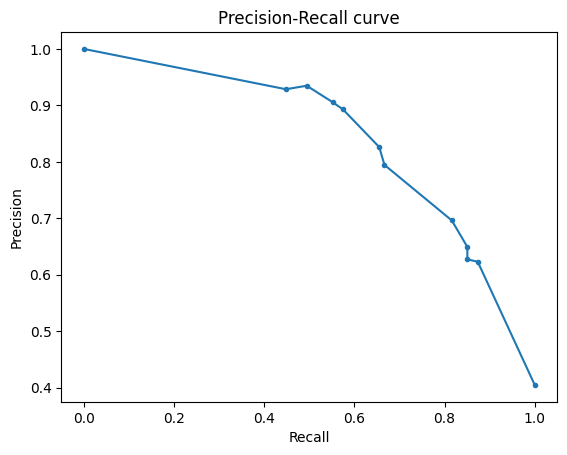

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()